# Hypotesetest for lineær regresjon med svingning og rullende gjennomsnitt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et siste eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet, at stigningstallet for den beste funskjonen på formen

$$F(t) = x_1 t + x_2 + x_3 \sin(\frac{2\pi t}{ 365.2425}) + x_4 \cos(\frac{2\pi t}{ 365.2425})$$

som tilnærmer sannsynlighetsfordelingen 
som temperaturmålingene er trukket fra, er større enn stigningstallet til linjen som vokser med vekstraten $\widetilde x_{1} = 1 \ C^{\circ}$ på 40 år.

Jeg vil bruke alle de daglige temperaturmålingene i datasettet vårt 
for å teste denne hypotesen.

Jeg antar at temperaturene er trukket fra en sannsynlighetsfordeling som har en beste lineær lilnærming på formen

$$F(t) = x_1 t + x_2 + x_3 \sin(\frac{2\pi t}{ 365.2425}) + x_4 \cos(\frac{2\pi t}{ 365.2425})$$

At $F(t)$ er en beste lineær tilnærming betyr at $x_1$, $x_2$, $x_3$ og $x_4$ er valgt slik at gjennomsnittsverdien til tallet $F(t) - y$ er minst mulig for et tilfeldig
trukket par $(t, y)$ av en tid $t$ og en temperatur $y$ til tiden $t$. For at teorien bak hypotesetesten skal fungere må størrelsen $F(t) - y$ være normalfordelt.

Hypotesen min kan formuleres som følger:

**Antatt stigningstall** $\widetilde x_1 = \frac{1 \ C^{\circ}}{\text{antall dager på 40 år}} = \frac{1 \ C^{\circ}}{14609.6 \text{ dager}} = 6.8448 \cdot 10^{-5}\ C^{\circ}/\text{dag}$

**Nullhypotese ($H_0)$:** $x_1 = \widetilde x_1$.

**Alternativ hypotese ($H_1$):** $x_1  > \widetilde x_1$.

## Temperaturdata

Jeg laster inn temperaturdata gitt ved tidspunkter $t_1, t_2, \dots t_n$ og tilhørende temperaturer $y_1, y_2, \dots, y_n$.
Jeg skriver 
$\mathbf{t} = [t_1, t_2, \dots, t_n]$ for punktet i $\mathbb{R}^n$ gitt ved tidene og 
$\mathbf{y} = [y_1, y_2, \dots, y_n]$ for punktet i $\mathbb{R}^n$ gitt ved temperaturene.

Jeg vil skrive 
$$F_{\mathbf{t},\mathbf{y}}(t) = 
x_1(\mathbf{t},\mathbf{y}) t + 
x_2(\mathbf{t},\mathbf{y}) +
x_3(\mathbf{t},\mathbf{y}) \sin(\frac{2\pi t}{ 365.2425}) +
x_4(\mathbf{t},\mathbf{y}) \cos(\frac{2\pi t}{ 365.2425})
$$
for den svingende regresjonslinjen gjennom datapunktene. I forrige uke så vi hvordan vi beregner 
$x_1(\mathbf{t},\mathbf{y})$,
$x_2(\mathbf{t},\mathbf{y})$,
$x_3(\mathbf{t},\mathbf{y})$,
og
$x_4(\mathbf{t},\mathbf{y})$.


In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats



In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [7]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()


In [8]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [9]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [11]:
#Vi leser inn tiden talt i dager fra første måling
data['t'] = (np.array(data.index) - np.array(data.index)[0]).astype(np.timedelta64(1, 'D')).astype(float)[:, None]

In [12]:
y = data['tavg_ffill'].values[:, None].astype(float)

In [13]:
# Beregner rullende gjennomsnitt
data['Rolling_Mean_tavg'] = data['tavg_ffill'].rolling(25 * 365, center=True).mean()

In [14]:
data.dropna(subset = ['Rolling_Mean_tavg'], inplace=True)

In [15]:
y = data['Rolling_Mean_tavg'].values[:, None].astype(float)

In [16]:
t = data['t'].values[:, None].astype(float)

In [17]:
B = np.hstack([t, np.ones_like(t), np.sin((2 * np.pi * t) / 365.2425), np.cos((2 * np.pi * t) / 365.2425)])#, np.sin((4 * np.pi * t) / 365), np.cos((4 * np.pi * t) / 365)])

På samme måten som vi fant koeffisienter for konstant- og lineært bidrag kan vi finne koeffisienter for de periodiske bidragene også:

In [18]:
xxx = np.linalg.solve(B.T @ B, B.T @ y)

Vi finner fire koeffisienter:

In [19]:
xxx

array([[ 8.41465495e-05],
       [ 7.37953250e+00],
       [-7.49622311e-04],
       [-5.24214990e-03]])

In [20]:
F = B @ xxx
data['årlig_forutsigelse'] = F

In [21]:
data['trend'] = B[:, :2] @ xxx[:2]

<Axes: xlabel='time'>

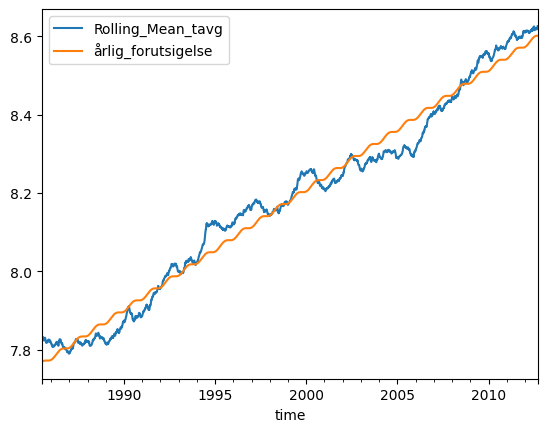

In [24]:
data.plot(y=['Rolling_Mean_tavg', 'årlig_forutsigelse'])

La oss se om feilen til den svingende regresjonen er normalfordelt:

In [25]:
data['årlig_residual'] = data['årlig_forutsigelse'] - data['Rolling_Mean_tavg']

In [27]:
data.index

DatetimeIndex(['1985-06-29', '1985-06-30', '1985-07-01', '1985-07-02',
               '1985-07-03', '1985-07-04', '1985-07-05', '1985-07-06',
               '1985-07-07', '1985-07-08',
               ...
               '2012-09-07', '2012-09-08', '2012-09-09', '2012-09-10',
               '2012-09-11', '2012-09-12', '2012-09-13', '2012-09-14',
               '2012-09-15', '2012-09-16'],
              dtype='datetime64[ns]', name='time', length=9942, freq='D')

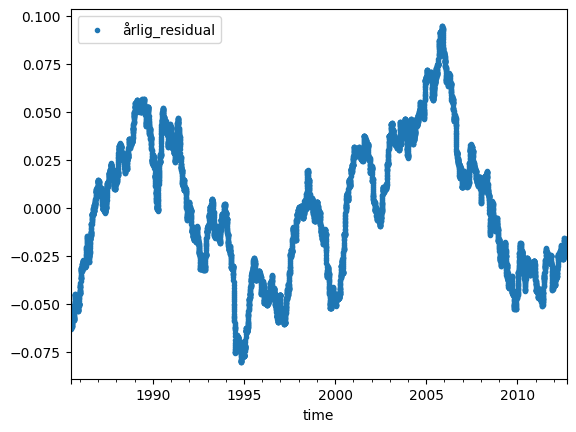

In [28]:
data.plot(y=['årlig_residual',], style='.');

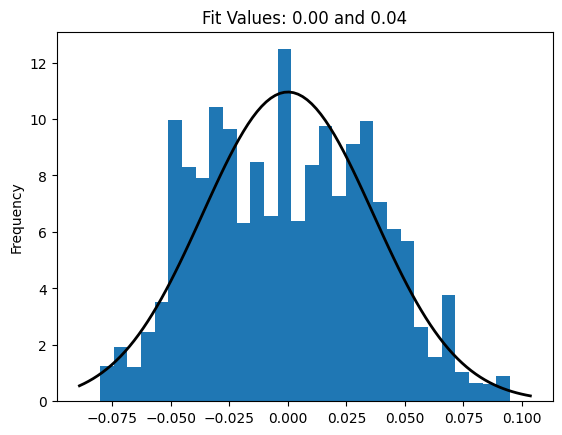

In [29]:
mu, std = scipy.stats.norm.fit(data['årlig_residual'])
data['årlig_residual'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title);

**Det ser ikke bra ut!**